## Load data

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import keras
from keras import layers
from keras.datasets import reuters

In [47]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

num_neurons = []
accuracy = []
quick_neurons = []
quick_accuracy = []

## def multi_hot_encode(sequences, num_classes):

In [6]:
def multi_hot_encode(sequences, num_classes):
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.
    return results

## def plot_accuracy(history):

In [34]:
def plot_accuracy(num_neurons, accuracy):
    plt.clf()
    plt.plot(num_neurons, accuracy, "r--", label="Accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Number of neurons")
    plt.xticks(num_neurons)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

## encode

In [10]:
x_train = multi_hot_encode(train_data, num_classes=10000)
x_test = multi_hot_encode(test_data, num_classes=10000)

In [11]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
print(x_train)
print(y_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## 64-4-64

In [14]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1039 - loss: 3.5184 - val_accuracy: 0.4010 - val_loss: 2.5349
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4562 - loss: 2.1694 - val_accuracy: 0.6260 - val_loss: 1.6296
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6788 - loss: 1.3506 - val_accuracy: 0.6680 - val_loss: 1.3795
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7280 - loss: 1.0954 - val_accuracy: 0.6910 - val_loss: 1.3180
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7590 - loss: 0.9338 - val_accuracy: 0.7020 - val_loss: 1.2942
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7941 - loss: 0.8024 - val_accuracy: 0.7100 - val_loss: 1.2727
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8123 - loss: 0.7454 - val_accuracy: 0.7030 - val_loss: 1.2899
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8169 - loss: 0.6743 - val_accuracy: 0.7060 - v

In [21]:
accuracy.append(history.history["val_accuracy"][-1])
num_neurons.append(4)

In [22]:
print(accuracy)
print(num_neurons)

[0.7179999947547913, 0.7390000224113464]
[4, 8]


## 64-8-64

In [18]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history_2 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1433 - loss: 3.5113 - val_accuracy: 0.5530 - val_loss: 2.4279
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5849 - loss: 2.0517 - val_accuracy: 0.6350 - val_loss: 1.4771
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6840 - loss: 1.2300 - val_accuracy: 0.6960 - val_loss: 1.3080
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7482 - loss: 0.9934 - val_accuracy: 0.7030 - val_loss: 1.2419
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7816 - loss: 0.8428 - val_accuracy: 0.7170 - val_loss: 1.2081
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8034 - loss: 0.7347 - val_accuracy: 0.7240 - val_loss: 1.1970
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8251 - loss: 0.6313 - val_accuracy: 0.7220 - val_loss: 1.1958
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8487 - loss: 0.5721 - val_accuracy: 0.7330 - v

In [19]:
accuracy.append(history_2.history["val_accuracy"][-1])
num_neurons.append(8)

In [20]:
print(accuracy)
print(num_neurons)

[0.7390000224113464]
[8]


## 68-16-64

In [23]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history_3 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3508 - loss: 3.2313 - val_accuracy: 0.6690 - val_loss: 1.5182
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7059 - loss: 1.3349 - val_accuracy: 0.7300 - val_loss: 1.2053
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7934 - loss: 0.9104 - val_accuracy: 0.7540 - val_loss: 1.0865
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8584 - loss: 0.6400 - val_accuracy: 0.7860 - val_loss: 1.0002
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9001 - loss: 0.4768 - val_accuracy: 0.7950 - val_loss: 0.9808
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9228 - loss: 0.3525 - val_accuracy: 0.7960 - val_loss: 0.9622
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9443 - loss: 0.2577 - val_accuracy: 0.7990 - val_loss: 0.9678
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9546 - loss: 0.2056 - val_accuracy: 0.8000 - v

In [24]:
accuracy.append(history_3.history["val_accuracy"][-1])
num_neurons.append(16)

In [25]:
print(accuracy)
print(num_neurons)

[0.7179999947547913, 0.7390000224113464, 0.7940000295639038]
[4, 8, 16]


## 64-32-64

In [26]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history_4 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3598 - loss: 3.0113 - val_accuracy: 0.6640 - val_loss: 1.4354
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7145 - loss: 1.2563 - val_accuracy: 0.7510 - val_loss: 1.1380
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8188 - loss: 0.8316 - val_accuracy: 0.7870 - val_loss: 0.9895
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8949 - loss: 0.5196 - val_accuracy: 0.8140 - val_loss: 0.9127
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9262 - loss: 0.3535 - val_accuracy: 0.8170 - val_loss: 0.8957
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9489 - loss: 0.2536 - val_accuracy: 0.8140 - val_loss: 0.9082
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9540 - loss: 0.1987 - val_accuracy: 0.8010 - val_loss: 0.9295
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9584 - loss: 0.1711 - val_accuracy: 0.8100 - v

In [27]:
accuracy.append(history_4.history["val_accuracy"][-1])
num_neurons.append(32)

In [28]:
print(accuracy)
print(num_neurons)

[0.7179999947547913, 0.7390000224113464, 0.7940000295639038, 0.8090000152587891]
[4, 8, 16, 32]


## 64-64-46

In [29]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history_5 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4782 - loss: 2.8853 - val_accuracy: 0.7110 - val_loss: 1.3592
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7550 - loss: 1.1350 - val_accuracy: 0.7750 - val_loss: 1.0319
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8548 - loss: 0.6743 - val_accuracy: 0.8100 - val_loss: 0.9098
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9167 - loss: 0.4102 - val_accuracy: 0.8220 - val_loss: 0.8793
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9430 - loss: 0.2709 - val_accuracy: 0.8110 - val_loss: 0.9003
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9559 - loss: 0.1996 - val_accuracy: 0.8180 - val_loss: 0.8988
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9575 - loss: 0.1702 - val_accuracy: 0.8120 - val_loss: 0.9549
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9604 - loss: 0.1540 - val_accuracy: 0.8100 - v

In [31]:
accuracy.append(history_5.history["val_accuracy"][-1])
num_neurons.append(64)

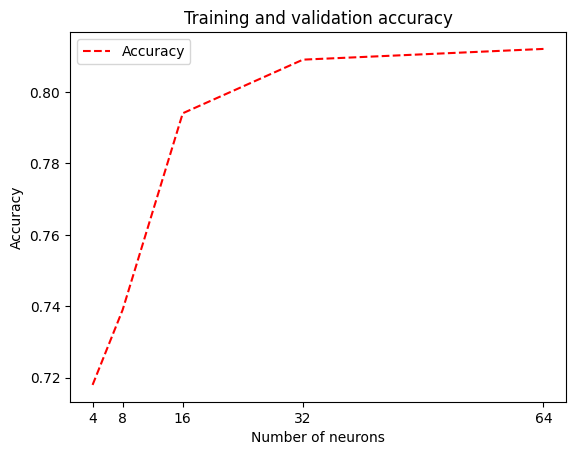

In [35]:
plot_accuracy(num_neurons, accuracy)

## Faster approach - 1 cell 5 models

In [48]:
for i in range(0, 5):
    middle_layer_neurons = 2**i * 4
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(middle_layer_neurons, activation="relu"),
        layers.Dense(46, activation="softmax")
    ])

    model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

    history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

    quick_accuracy.append(history.history["val_accuracy"][-1])
    quick_neurons.append(middle_layer_neurons)



Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0479 - loss: 3.5589 - val_accuracy: 0.2660 - val_loss: 2.6613
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3806 - loss: 2.3033 - val_accuracy: 0.5900 - val_loss: 1.6326
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6114 - loss: 1.4784 - val_accuracy: 0.6720 - val_loss: 1.4214
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7304 - loss: 1.1426 - val_accuracy: 0.7000 - val_loss: 1.3235
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7562 - loss: 0.9770 - val_accuracy: 0.7000 - val_loss: 1.3089
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7655 - loss: 0.8756 - val_accuracy: 0.7060 - val_loss: 1.2984
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7915 - loss: 0.7795 - val_accuracy: 0.7070 - val_loss: 1.3027
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8049 - loss: 0.7199 - val_accuracy: 0.7180 - v

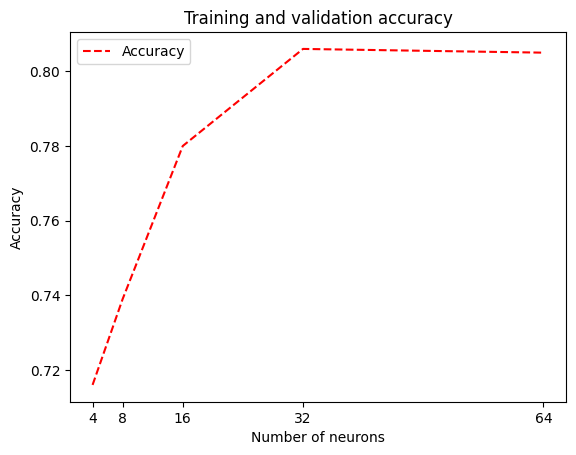

In [49]:
plot_accuracy(quick_neurons, quick_accuracy)

## Information Bottleneck
- Notice the loss of validation accuracy when the middle layer is drastically reduced in neuron count
- this happens because we are reducing the dimensions the model is using resulting in a compression of information into less dimensions
- This intermediate space can cram most of the information but some is lost
- Once the neurons return to ~32 or more the validation accuracy rises back to normal. Normal in the sense of being closer to the output of 46 in the final layer